In [1]:
import pandas as pd
import glob
import numpy as np

import pylab as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline

import rnn

/software/python-3.6.1-el7-x86_64+intel-16.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def plot(files, cynetdf, title):
    
    fnames = glob.glob(files)
    
    rnndf = pd.DataFrame(data=[rnn.flexroc(fname) for fname in fnames])
    rnndf = rnndf.set_index(['lat1','lat2','lon1','lon2']).stack().reset_index().rename(columns={'level_4':'var',0:'auc_NN'}).round(4)
    df = cynetdf.set_index(['lat1','lat2','lon1','lon2','var']).join(rnndf.set_index(['lat1','lat2','lon1','lon2','var'])).reset_index().dropna()
    
    # plt.figure(figsize=(8, 4))
    ax = df.reset_index(drop=True).auc.plot(style='o', label='Cynet')
    df.reset_index(drop=True).auc_NN.plot(ax=ax, style='o',label='NN')
    plt.gca().set_ylabel('auc')
    plt.gca().legend()
    plt.title(title)
    plt.savefig('{}_scatter.png'.format('_'.join(title.split())), dpi=200, bbox_inches='tight')
    plt.show()
    
    # plt.figure(figsize=(8, 4))
    sns.distplot(df.auc)
    ax = sns.distplot(df.auc_NN)
    ax.axvline(df.auc_NN.mean(), color='red')
    ax.set_ylabel('density')
    ax.set_title(title)
    plt.savefig('{}_density.png'.format('_'.join(title.split())), dpi=200, bbox_inches='tight')


In [3]:
cynetdf = pd.read_csv('../data/cynet_performance.csv').round(4)

In [4]:
top_shallow = './finalizedResults/top10_shallow/*rnnres'
top_deep = './finalizedResults/top10_deep/*rnnres'
random_shallow = './finalizedResults/random_shallow/*rnnres'
random_deep = './finalizedResults/random_deep/*rnnres'

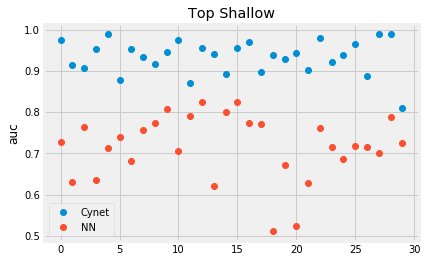

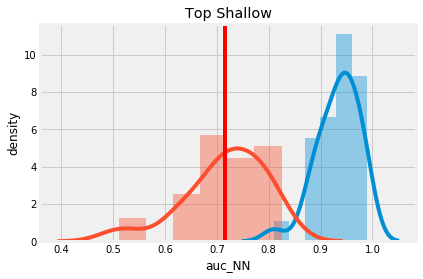

In [5]:
plot(top_shallow, cynetdf, 'Top Shallow')

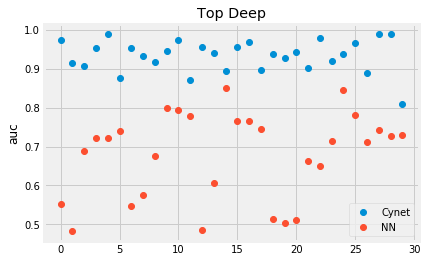

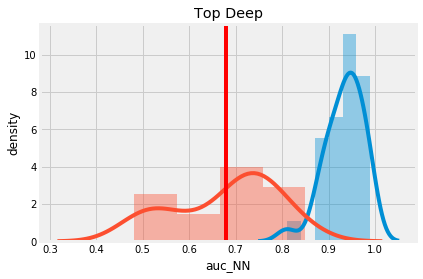

In [6]:
plot(top_deep, cynetdf, 'Top Deep')

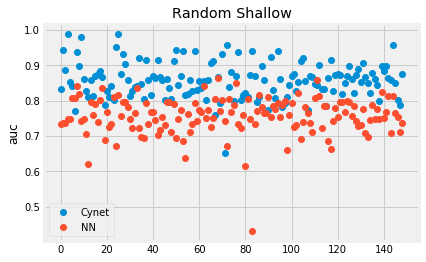

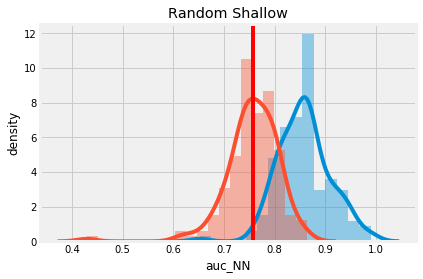

In [7]:
plot(random_shallow, cynetdf, 'Random Shallow')

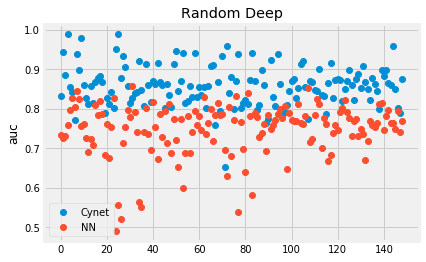

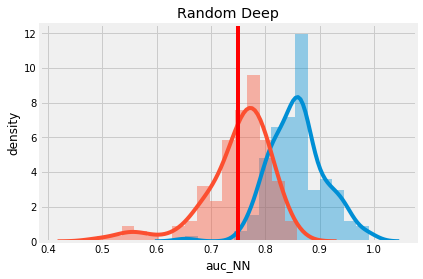

In [8]:
plot(random_deep, cynetdf, 'Random Deep')

In [27]:
def organize(files, cynetdf, fname):
    dfs = []
    for file in files:
        fnames = glob.glob(file)
    
        rnndf = pd.DataFrame(data=[rnn.flexroc(fname) for fname in fnames])
        rnndf = rnndf.set_index(['lat1','lat2','lon1','lon2']).stack().reset_index().rename(columns={'level_4':'var',0:'auc_rnn'}).round(4)
        df = cynetdf.set_index(['lat1','lat2','lon1','lon2','var']).join(rnndf.set_index(['lat1','lat2','lon1','lon2','var'])).reset_index().dropna()
        dfs.append(df)
    
    df_full = pd.concat(dfs)
    df_full['ratio'] = df_full['auc'] / df_full['auc_rnn']
    df_full['increase'] = df_full['ratio'] - 1.
    df_full['index'] = range(len(df_full))
    df_full['index'] = df_full['index'] + 1
    
    df_full[['index', 'auc', 'auc_rnn', 'ratio', 'increase']].to_csv(fname, index=False)
    print(df_full.head())

In [28]:
organize([random_shallow], cynetdf, 'crime_random_shallow.csv')
organize([random_deep], cynetdf, 'crime_random_deep.csv')
organize([top_shallow], cynetdf, 'crime_top_shallow.csv')
organize([top_deep], cynetdf, 'crime_top_deep.csv')

organize([random_shallow, top_shallow], cynetdf, 'crime_shallow.csv')
organize([random_deep, top_deep], cynetdf, 'crime_deep.csv')

        lat1     lat2     lon1     lon2                                 var  \
96   41.6852  41.6879 -87.6221 -87.6186  BURGLARY-THEFT-MOTOR_VEHICLE_THEFT   
97   41.6852  41.6879 -87.6221 -87.6186            HOMICIDE-ASSAULT-BATTERY   
98   41.6852  41.6879 -87.6221 -87.6186                                 VAR   
308  41.7211  41.7239 -87.5799 -87.5764  BURGLARY-THEFT-MOTOR_VEHICLE_THEFT   
309  41.7211  41.7239 -87.5799 -87.5764            HOMICIDE-ASSAULT-BATTERY   

        auc  auc_rnn     ratio  increase  index  
96   0.8331   0.7328  1.136872  0.136872      1  
97   0.9442   0.7357  1.283404  0.283404      2  
98   0.8858   0.7359  1.203696  0.203696      3  
308  0.9898   0.7471  1.324856  0.324856      4  
309  0.8539   0.7469  1.143259  0.143259      5  
        lat1     lat2     lon1     lon2                                 var  \
96   41.6852  41.6879 -87.6221 -87.6186  BURGLARY-THEFT-MOTOR_VEHICLE_THEFT   
97   41.6852  41.6879 -87.6221 -87.6186            HOMICIDE-ASSAULT